In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Experimentos del TP de Heurísticas
En esta carpeta de Jupyer vamos a poner lo relativo a realizar la experimentación computacional.
- **Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.**
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.

# Datasets
Para los experimentos se crean las siguientes familias de instancias para evaluar los distintos métodos.
1. **densidad-alta**: Son instancias con n = 1..200 y con densidad alta, es decir, los números de S son altos en comparación con W.
2. **densidad-baja**: Son instancias con n = 1..200 y con densidad baja, o sea, se necesitan muchos números de S para sumar W.
3. **mejor-caso-BT**: Instancias de mejor caso para el algoritmo de BT con podas.
4. **peor-caso-BT**: Instancias de peor caos para el algoritmo de BT con podas.
5. **dinamica**: Instancias con n y w variando para probar el algoritmo de PD.

# Métodos
Los métodos evaluados en este notebook son los siguientes:
- **VMC**: Heurística Vecino mas cercano.
- **HI**: Heurística de inserción.
- **AGMH**: Heurística DE Árblo Generador Mínimo.
- **TSE-AGM**: Tabu Seach basada en estructuras, usando AGMH.
- **TSE-VMC**: Tabu Seach basada en estructuras usando VMC.
- **TSE-HI**: Tabu Seach basada en estructuras, usando HI.
- **TSC-AGM**: Tabu Seach basada en ciclos, usando AGMH.
- **TSC-AGM**: Tabu Seach basada en ciclos, usando VMC.
- **TSC-AGM**: Tabu Seach basada en ciclos, usando HI.

# Experimentos
Leemos el dataframe con todos los resultados.

In [104]:
df_resultados = pd.read_csv("resultados/resultado.csv");



## Experimento 1: Análisis Tabu Search

Variamos el porcentaje de la vecindad 

In [69]:
df_variacion_vecinos_TSC_AGM = df_resultados[(df_resultados["metodo"]=="TSC-AGM") & (df_resultados["caso"]=="variando-vecinos")].copy();
fig = sns.scatterplot(data=df_variacion_vecinos_TSC_AGM, x='porcentajeVecindad', y='costo', hue='metodo');

df_variacion_vecinos_TSE_AGM = df_resultados[(df_resultados["metodo"]=="TSE-AGM") & (df_resultados["caso"]=="variando-vecinos")].copy();
fig = sns.scatterplot(data=df_variacion_vecinos_TSE_AGM, x='porcentajeVecindad', y='costo', hue='metodo');


#fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/fb-densidades.svg");

KeyError: 'caso'

Hago zoom a TSC-AGM, el mejor valor es tomar la vecindad entera, pero es muy "caro", asi qur tomo el 30 % de la vecindad

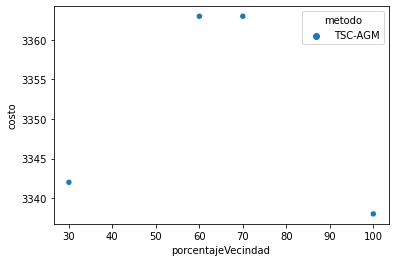

In [53]:
df_variacion_vecinos_TSC_AGM = df_resultados[(df_resultados["metodo"]=="TSC-AGM") & (df_resultados["caso"]=="variando-vecinos")].copy();
fig = sns.scatterplot(data=df_variacion_vecinos_TSC_AGM[df_variacion_vecinos_TSC_AGM["costo"] < 3380], x='porcentajeVecindad', y='costo', hue='metodo');

### Variamos el tamaño de la lista tabu

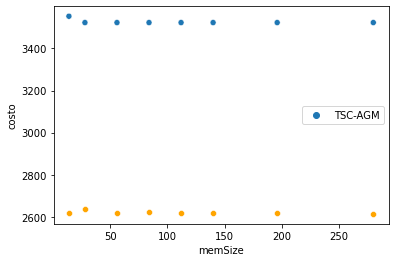

In [38]:
#df_complejidad_FB = df_resultados[df_resultados["metodo"]=="FB"].copy();
df_variacion_memSize_TSC_AGM = df_resultados[(df_resultados["metodo"]=="TSC-AGM") & (df_resultados["caso"]=="variando-memoria")].copy();
fig = sns.scatterplot(data=df_variacion_memSize_TSC_AGM, x='memSize', y='costo', hue='metodo');

df_variacion_memSize_TSE_AGM = df_resultados[(df_resultados["metodo"]=="TSE-AGM") & (df_resultados["caso"]=="variando-memoria")].copy();
fig = sns.scatterplot(data=df_variacion_memSize_TSE_AGM, x='memSize', y='costo', color='orange' );

#fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/fb-densidades.svg");

#### Grafico TSE-AGM variando el tamaño de la memoria
El mejor valor lo obtengo tomando menSize = n

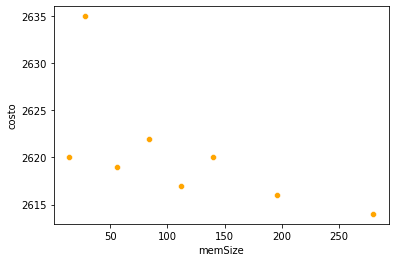

In [39]:
df_variacion_memSize_TSE_AGM = df_resultados[(df_resultados["metodo"]=="TSE-AGM") & (df_resultados["caso"]=="variando-memoria")].copy();
fig = sns.scatterplot(data=df_variacion_memSize_TSE_AGM, x='memSize', y='costo', color='orange' );

#fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/fb-densidades.svg");

### Grafico Tabu Search variando las iteraciones

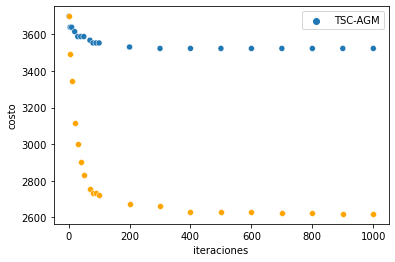

In [40]:
#df_complejidad_FB = df_resultados[df_resultados["metodo"]=="FB"].copy();
df_variacion_iteraciones_TSC_AGM = df_resultados[(df_resultados["metodo"]=="TSC-AGM") & (df_resultados["caso"]=="variando-iteraciones")].copy();
fig = sns.scatterplot(data=df_variacion_iteraciones_TSC_AGM, x='iteraciones', y='costo', hue='metodo');

df_variacion_iteraciones_TSE_AGM = df_resultados[(df_resultados["metodo"]=="TSE-AGM") & (df_resultados["caso"]=="variando-iteraciones")].copy();
fig = sns.scatterplot(data=df_variacion_iteraciones_TSE_AGM, x='iteraciones', y='costo', color='orange' );

#fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/fb-densidades.svg");

#### TSE-AGM variando iteraciones

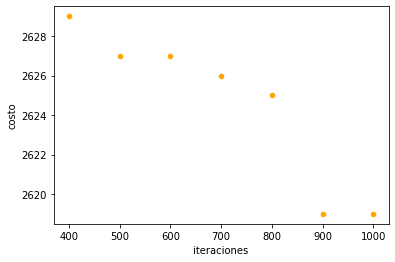

In [49]:
df_variacion_iteraciones_TSE_AGM = df_resultados[(df_resultados["metodo"]=="TSE-AGM") &
                                                 (df_resultados["caso"]=="variando-iteraciones")].copy();
fig = sns.scatterplot(data=df_variacion_iteraciones_TSE_AGM[(df_variacion_iteraciones_TSE_AGM["costo"] < 2640) & (df_variacion_iteraciones_TSE_AGM["costo"] > 2600)], x='iteraciones', y='costo', color='orange' );


## Experimento 2: Comparacion Calidad

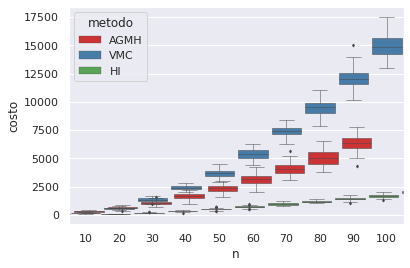

In [183]:
df_resultados = pd.read_csv("resultados/resultado-comparacion-calidad-2.csv");
sns.set(style="darkgrid")
sns.boxplot(x="n", y="costo", hue="metodo", data=df_resultados, palette="Set1", width=2.7,orient="v",fliersize=2,linewidth=0.5)
plt.show()


## Experimento 3: Comparacion Tiempo

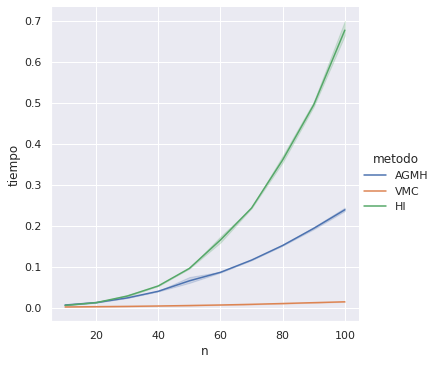

In [189]:

sns.relplot(data=df_resultados,x="n", y="tiempo",hue="metodo",kind="line")
plt.show()

## Experimento 3: Comparacion Tiempo vs Calidad

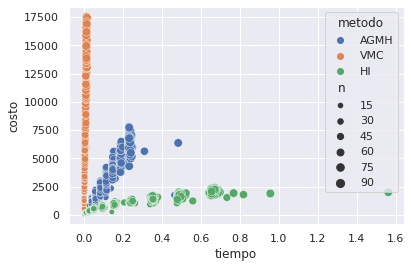

In [202]:
df_fijo = df_resultados[(df_resultados["n"]==50)].copy();
sns.scatterplot(data=df_resultados, x="tiempo", y="costo", hue="metodo",size="n")
plt.show()

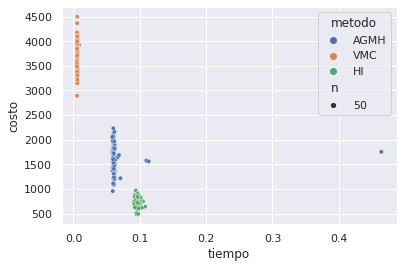

In [204]:
df_fijo = df_resultados[(df_resultados["n"]==50)].copy();
sns.scatterplot(data=df_fijo, x="tiempo", y="costo", hue="metodo",size="n")
plt.show()

### Ejemplo para tabusearch

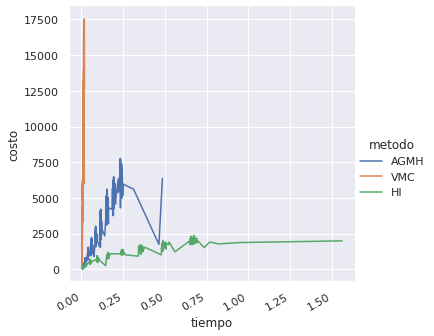

In [211]:
g = sns.relplot(x="tiempo", y="costo",hue="metodo" ,kind="line", data=df_resultados)
g.fig.autofmt_xdate()